## Data Science in Python

### Analysing the Data Collected

####  API Choosed: Last.FM API
#### Link: https://www.last.fm/api  
#### Keywords: music, entertainment


#### Considering the data from the API reterived 

In [27]:
import pandas as pd
df = pd.read_csv("lastfm_data.csv")

In [28]:
print(df.head())

    Artist                                              Track  Playcount  \
0  Karthik                                              Behka      16433   
1  Karthik  Oru Maalai (Language: Tamil; Film: Ghajini; Fi...       5470   
2  Karthik                                             Chance       4576   
3  Karthik                         Thooriga - From "Navarasa"      17755   
4  Karthik                                         Oru Maalai      16228   

                                               Album  Duration  Listeners  \
0                                            Ghajini    311000       3255   
1                                            Ghajini    353000       2848   
2                                             Energy    202000       2463   
3                                            Unknown         0       2244   
4  Ghajini (Original Motion Picture Soundtrack) - EP         0       2190   

                                                Tags  \
0  ['bollywood', 'Hindi'

### Cleaning and filtering the data and checking with few methods within data

#### Data cleaning is the major factor when performing the analysis of the dataset that is considered, moreover few methods are followed to clean the data and make ready for visualisations. 
#### Firstly, stated by checking the null values in the dataset, by using the df.isna() this function checks the null values in the dataset. The columns that retrieves and used for analysis form the collected data is play counts and artists and listeners, duration for few comparisons. The other fields such as Artist URL and Track URL were not necessarily needed for analysis. So, these were removed and only the required fields were considered. Finally after finalising the fields the tracks and total plays were used for analysis with considered artists.  


#### Appplying the data into the appropriate formate and considering the measures like Data pre-processing, including the cleaning and filtering or transforming the data before analysis. 

In [29]:
print(df.isnull().sum())

Artist        0
Track         0
Playcount     0
Album         0
Duration      0
Listeners     0
Tags          0
Artist URL    0
Track URL     0
dtype: int64


In [30]:
df['Playcount'] = df['Playcount'].astype(int)

In [31]:
df = df.drop_duplicates()

In [32]:
df = df.drop(columns=['Artist'])

In [33]:
df = df.query('Playcount > 0')

In [34]:
df = df.groupby(['Track']).agg({'Playcount': 'sum'}).reset_index()

In [35]:
df = df.sort_values('Playcount', ascending=False).reset_index(drop=True)

In [36]:
df = df.reset_index(drop=True)

In [37]:
df = df.rename(columns={'Playcount': 'Total Plays'})

In [38]:
df = df.dropna()

In [39]:
df.shape

(3318, 2)

In [40]:
df.head()

,Track,Total Plays
0,"Arabic Kuthu - Halamithi Habibo (From ""Beast"")",93497
1,"Naatu Naatu (From ""Rrr"")",89259
2,Why This Kolaveri Di? - The Soup of Love,85286
3,Kannazhaga - The Kiss of Love,79654
4,Vikram - Title Track,53970


### Characterization for the data and the Explanation and interpretation of the analysis and the results. 

#### Descriptive statistics
#### Data Visualization
#### Outlier analysis
#### Correlation analysis
#### Data distribution analysis
#### Dimensionality reduction

#### In applying the Characterization, to the dataset for understanding the data through descriptive statistics and visulizations which gives the clear idea of data is performed. The steps involved in characterization were, descriptive statistics which measure the mean, median and mode, standard deviation, range, quartiles, here the play count for each artist is compared. Data visualisation which is capable of analysing the data by bar charts and scatter plots and it has an ability to distinguish the relation between the parameters, the correlation analysis is used to determine the strength to enhance the correlation between the number of tracks an artist has and their total playcount. Outlier analysis which is used for normality tests, skewness tests and it helps us to determine the data can be normally distributed or skewed. Dimensionality reduction is another technique which is used to analyse the PCA to reduce the dimensionality of the data and gain insights into the patterns of the data. 



### Descriptive statistics

#### The gathering, organization, analysis, interpretation, and presentation of data were the parameters of descriptive statistics, a subset of statistics. Measures of central tendency such as mean, median, and mode and measures of variability like range, variance, or standard deviation and measurements of shape are some of the techniques used to summarize and describe the key characteristics of a dataset. Insights into the underlying structure of the data, patterns and trends, the detection of outliers, and comparisons among various groups or variables can all be gained by using descriptive statistics which are frequently employed as a first step in exploratory data analysis (EDA) to comprehend the distribution and properties of the data. 

In [41]:
print(df['Total Plays'].describe())

count     3318.000000
mean      1644.580772
std       5064.165609
min          1.000000
25%         69.250000
50%        273.000000
75%       1042.500000
max      93497.000000
Name: Total Plays, dtype: float64


##### Count it states the number of non-missing values in the column, the mean of the values in the column whereas the std is the standard deviation of the values in the column and minimum value in the column, maximum value in the column
##### 25%: the 25th percentile of the values in the column
##### 50%: the median (50th percentile) of the values in the column
##### 75%: the 75th percentile of the values in the column

### Data Visualization

#### Data analysed with various fields is as listed on the start of the Visualization, Data visualization is the graphical depiction of data and information. It is a crucial part of information science and analysis since it helps in the easy communication of ideas and patterns in the data. There are many different ways to visualize data, including charts, graphs, maps, and infographics. It can be applied to data exploration, pattern recognition, and sharing findings with users.  Across several steps of the data analysis process, from data exploration to presenting a study's findings, data visualization can be used. 


##### Bar chart of top 2 tracks by playcount for each artist

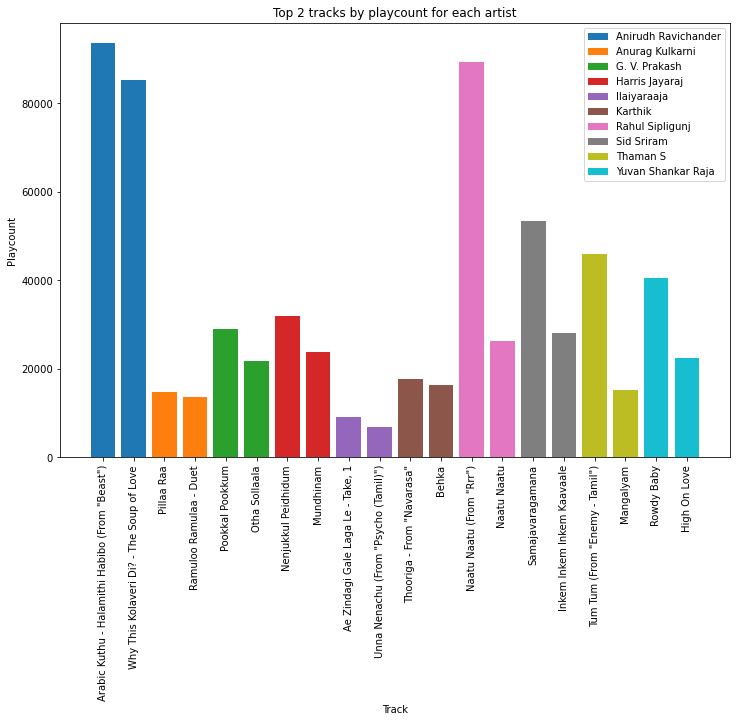

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("lastfm_data.csv")

# Group by artist and track, and sum playcount for each track
grouped = df.groupby(['Artist', 'Track']).sum().reset_index()

# Get top 2 tracks by playcount for each artist
top_tracks = grouped.groupby('Artist').apply(lambda x: x.nlargest(2, 'Playcount')).reset_index(drop=True)

# Sort by playcount in ascending order
top_tracks = top_tracks.sort_values(by='Playcount', ascending=False)

# Create bar chart
fig, ax = plt.subplots(figsize=(12,8))
for artist, data in top_tracks.groupby('Artist'):
    ax.bar(data['Track'], data['Playcount'], label=artist)
ax.set_xlabel('Track')
ax.set_ylabel('Playcount')
ax.set_title('Top 2 tracks by playcount for each artist')
ax.legend()
plt.xticks(rotation=90)
plt.show()


##### Top 2 songs by each artist 

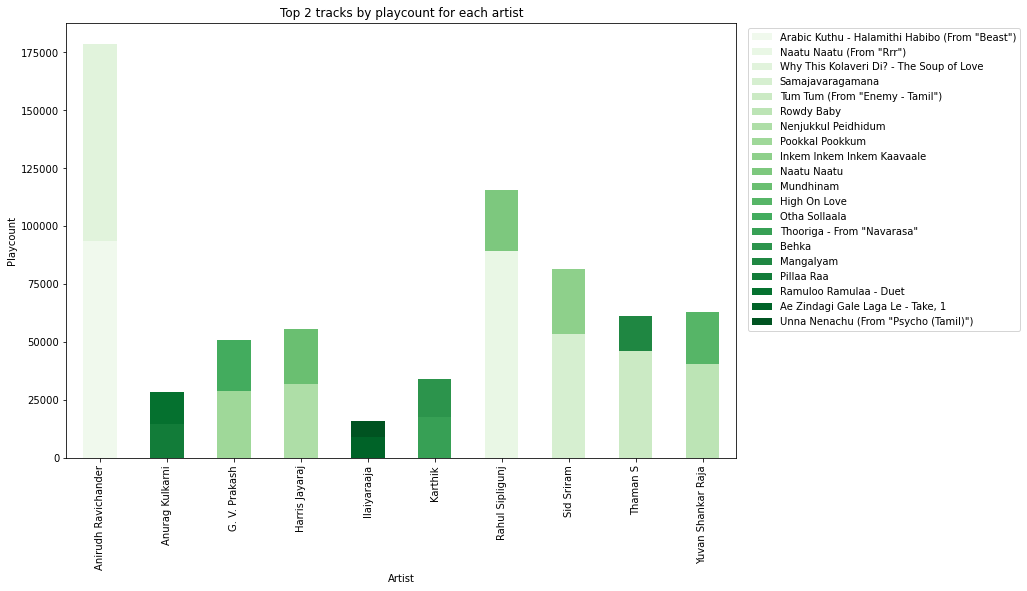

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("lastfm_data.csv")

# Group by artist and track, and sum playcount for each track
grouped = df.groupby(['Artist', 'Track']).sum().reset_index()

# Get top 2 tracks by playcount for each artist
top_tracks = grouped.groupby('Artist').apply(lambda x: x.nlargest(2, 'Playcount')).reset_index(drop=True)

# Sort by playcount in descending order
top_tracks = top_tracks.sort_values(by='Playcount', ascending=False)

# Pivot the data to create a stacked bar plot
pivoted = top_tracks.pivot(index='Artist', columns='Track', values='Playcount').fillna(0)

# Define a color palette
palette = sns.color_palette('Greens', n_colors=len(pivoted.columns))

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(12,8))
pivoted = pivoted.reindex(sorted(pivoted.columns, key=lambda x: pivoted[x].sum(), reverse=True), axis=1) # sort columns by total playcount
pivoted.plot(kind='bar', stacked=True, ax=ax, color=palette)
ax.set_xlabel('Artist')
ax.set_ylabel('Playcount')
ax.set_title('Top 2 tracks by playcount for each artist')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()


##### The colour format over this bar chart represents the total play counts and the preceding colour refers to the artist considered.   

##### Total play count and artists bar plot

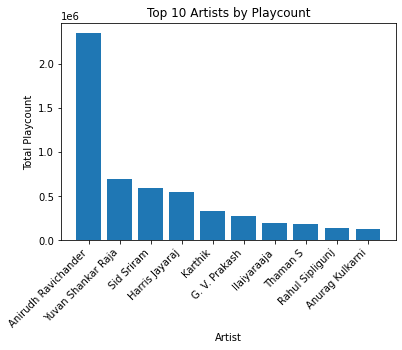

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('lastfm_data.csv')
top_artists = df.groupby('Artist')['Playcount'].sum().sort_values(ascending=False)[:150]

plt.bar(top_artists.index, top_artists.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Artist')
plt.ylabel('Total Playcount')
plt.title('Top 10 Artists by Playcount')
plt.show()


##### A Matplotlib-based Python data visualisation library is called Seaborn. It provides an advanced interface for producing appealing and informative statistical visuals. Since Seaborn is based on Matplotlib, its API is fully consistent with that of Matplotlib. But, Seaborn offers a lot of additional functionalities that minimise the number of code required for creating complicated visualisations. Few options where this is more useful like in built-in themes, this Seaborn includes a variety of built-in themes that make it simple to produce sight visualisations without having to manually change the style.  A variety of additional plot types, including heatmaps, violin plots, and categorical plots, which are not offered by Matplotlib, are provided by Seaborn for more complicated visualisations. Seaborn sets better defaults.

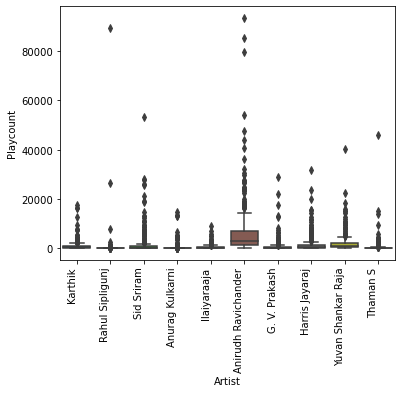

In [45]:
import pandas as pd
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('lastfm_data.csv')

# Create a boxplot using Seaborn
sns.boxplot(x='Artist', y='Playcount', data=df)

plt.xticks(rotation=90, ha='right')
plt.subplots_adjust(bottom=0)

plt.show()


#### Scatter plot of the playcount vs rank

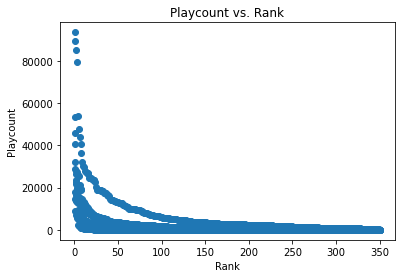

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('lastfm_data.csv')
df['Rank'] = df.groupby('Artist')['Playcount'].rank(ascending=False)

plt.scatter(df['Rank'], df['Playcount'])
plt.xlabel('Rank')
plt.ylabel('Playcount')
plt.title('Playcount vs. Rank')
plt.show()

##### To analyse the popularity of tracks and artists based on their playcounts and listener counts, rank can be plotted in this dataset. The position of an artist on a given chart or overall rating based on different factors is indicated by the rank. The listeners' patterns and tastes may be revealed by the ranking plot, which can also be used to pinpoint the most well-liked songs and performers within a given genre or time frame. It can also be used to examine the relative popularity of different songs and artists and find a most popular.

### Outlier analysis

##### An important phase in data analysis is the identification and processing of data points that result in differences from the rest of the dataset. This is called outlier analysis. These data points, also known as outliers, can influence the outcomes of data analysis and result in incorrect inferences.  By running the "Playcount" and "Listeners" variables through the outlier analysis. Several statistical techniques, such as the Interquartile Range (IQR) can be used to spot outliers in these columns. The IQR approach is used in this case to locate and manage outliers in the dataset.

##### Box plots are suggested for data visualisation because they provide a quick and simple approach to see how a dataset is organised and detect potential outliers. Box plots show the minimum and maximum values as well as the quartiles of a dataset. The median is shown as a line within the box, which represents the median 50% of the data. All values outside of the bars are plotted as individual points and may be regarded as outliers, whereas the stalks extend to the minimum and maximum values that are not considered as outliers.  When comparing many datasets, box plots are especially helpful since they make it simple to graphically examine the quartiles and scatter of each dataset.

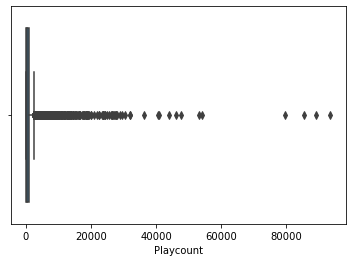

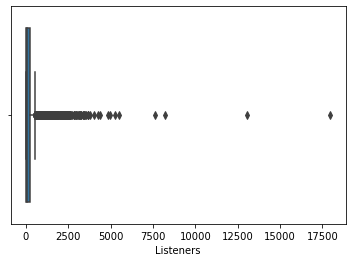

In [47]:
# Create boxplot for Playcount
sns.boxplot(x=df["Playcount"])
plt.show()

# Create boxplot for Listeners
sns.boxplot(x=df["Listeners"])
plt.show()


##### Calculating the IQR, or the ratio between the data's 75th percentile (Q3) and 25th percentile (Q1), is a procedure in the IQR method. A data point is called an outlier and can be excluded from the dataset if it comes outside the range of (Q1 - 1.5IQR) and (Q3 + 1.5IQR).

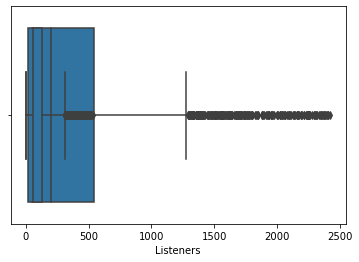

In [49]:
# Calculate the IQR for the 'Playcount' column
Q1 = df['Playcount'].quantile(0.25)
Q3 = df['Playcount'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers in the 'Playcount' column
outliers_playcount = df[(df['Playcount'] < Q1 - 1.5*IQR) | (df['Playcount'] > Q3 + 1.5*IQR)]

# Calculate the IQR for the 'Listeners' column
Q1 = df['Listeners'].quantile(0.25)
Q3 = df['Listeners'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers in the 'Listeners' column
outliers_listeners = df[(df['Listeners'] < Q1 - 1.5*IQR) | (df['Listeners'] > Q3 + 1.5*IQR)]

# Create a boxplot to visualize the outliers
sns.boxplot(x=df['Playcount'])
sns.boxplot(x=df['Listeners'])

# Remove the outliers from the dataset
df = df[~df['Playcount'].isin(outliers_playcount['Playcount'])]
df = df[~df['Listeners'].isin(outliers_listeners['Listeners'])]


##### To understand how frequently each tune is played, the range of Playcount for the Last.fm data is plotted. We can see the variety of play counts and its distribution by taking a look at the distribution. This information can be helpful in determining which tracks are well-liked or which tracks may have unusually high play counts. Also, it can help in identifying any data quality problems that could affect the analysis, such as missing or inaccurate numbers. The   distribution of play count is a vital step in understanding the Last.fm data since it offers a useful summary of how frequently each tune is played.

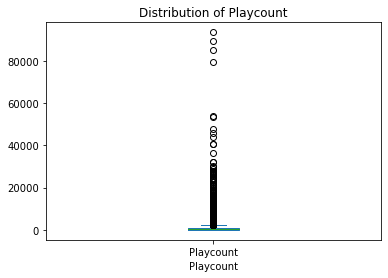

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("lastfm_data.csv")

df["Playcount"].plot(kind="box")
plt.title("Distribution of Playcount")
plt.xlabel("Playcount")
plt.show()

#### The above box plot and scatter plot which shows the relationship between the playcount and tracks of each artist is the Outlier analysis

##### Stacked bar plot  of playcounts by artist and track 

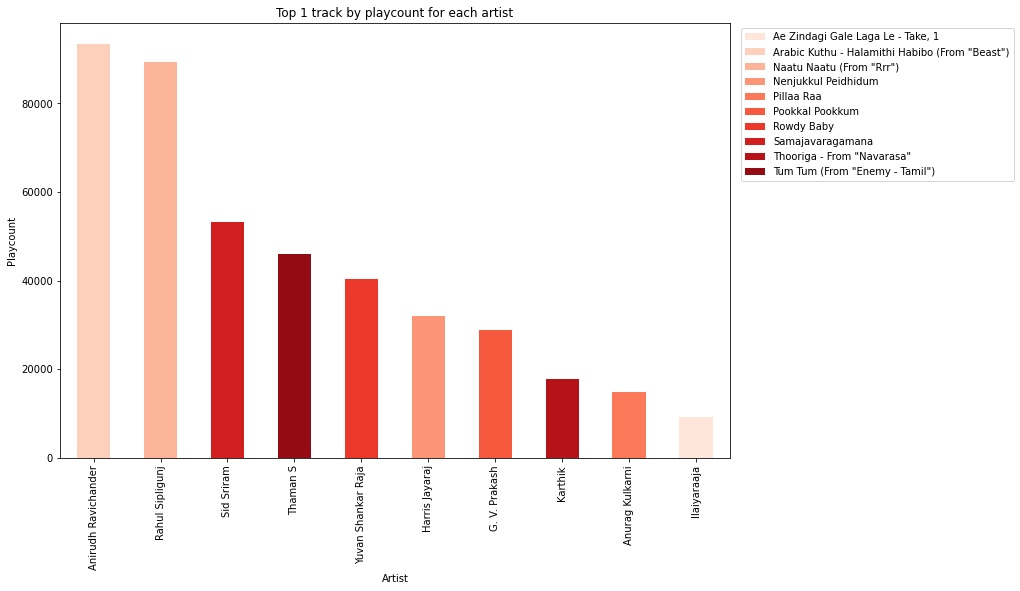

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("lastfm_data.csv")

# Group by artist and track, and sum playcount for each track
grouped = df.groupby(['Artist', 'Track']).sum().reset_index()

# Get top 1 track by playcount for each artist
top_tracks = grouped.groupby('Artist').apply(lambda x: x.nlargest(1, 'Playcount')).reset_index(drop=True)

# Sort by playcount in descending order
top_tracks = top_tracks.sort_values(by='Playcount', ascending=False)

# Pivot the data to create a stacked bar plot
pivoted = top_tracks.pivot(index='Artist', columns='Track', values='Playcount').fillna(0)

# Sort by total playcount in descending order
pivoted = pivoted.loc[pivoted.sum(axis=1).sort_values(ascending=False).index]

# Define a color palette
palette = sns.color_palette('Reds', n_colors=len(pivoted.columns))

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(12,8))
pivoted.plot(kind='bar', stacked=True, ax=ax, color=palette)
ax.set_xlabel('Artist')
ax.set_ylabel('Playcount')
ax.set_title('Top 1 track by playcount for each artist')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()


##### For the representation of the relative values of several categories, stacked bar graphs are used. They are helpful for showing both the average contributions of each category and the particular contributions of each subcategory. Stack bar plots are especially helpful for comparing the sizes of several groups overall and the relative proportions of various sub-groups within each category. They are often used in data visualisation to compare multiple categories or sub-groups under various conditions or to demonstrate how categories or sub-groups develop over time.


### Correlation analysis

##### A statistical technique called correlation analysis is used to measure the size and direction of the association between two or more variables. It ranks among the most popular methods in data science since it enables researchers to investigate the relationships among different variables and get predictions from these correlations.  To find trends and patterns in data, test hypotheses, and make predictions about the future, correlation analysis can be used

##### Correlation analysis is used for correlation analysis, where firstly the data categorical data is converted into the numerical form but here the data is already in numerical format. Below is the way of performing the correlation analysis

In [52]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)


           Playcount  Duration  Listeners
Playcount   1.000000  0.050241   0.940678
Duration    0.050241  1.000000   0.056667
Listeners   0.940678  0.056667   1.000000


##### The correlation matrix is used to measure the strength of the linear relationship between the two variables and these were notated by -1 which pimples the perfect negative correlation and 0 represents the no linear relationship between the variables, that is they are independent of each other and will not affect each others values. 

##### A heatmap is a graphic representation of information displaying various values using a colour scheme. Heatmaps are widely used in data analysis to show how variables in a dataset are related. Finding the strength and direction of the association between variables is made simple and quick by the heatmap. In large datasets, patterns, trends, and outliers can be identified by using colour coding. Examples for heatmaps include locating clusters or groupings in data, determining the factors with the strongest correlations, and showing changes over time. In fields like data science, machine learning, and data visualisation, they are usually applied.

##### Visualize the correlation matrix using the heatmap 

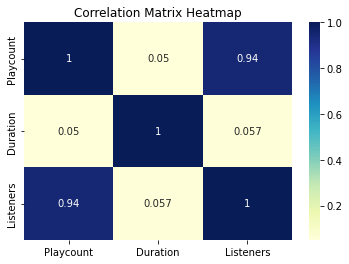

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('lastfm_data.csv')

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap using seaborn library
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### As shown by the different cross comparing the data using the heatmap the value at most near to one will match the perfect correlation and this demotes the perfect correlation between the fields considered between the listeners and playcount, and bad oin compared to that of the duration and playcount. 

### Data distribution analysis

##### Data distribution analysis, which involves evaluating a dataset's distribution to understand its underlying qualities, is a key component of data science. It is important because the manner in which the information is distributed affects the statistical models and methods that can be used to analyse it. In data distribution analysis, we analyse a dataset's frequency of values and how those values are distributed across a possible range of values. Histograms, box plots, density plots, and scatter plots are a few instances of the approaches we might use to illustrate and characterise the distribution of data.


##### This data distribution analysis, where this is used for statistical techniques such as histogram and density plots and probability plots. 

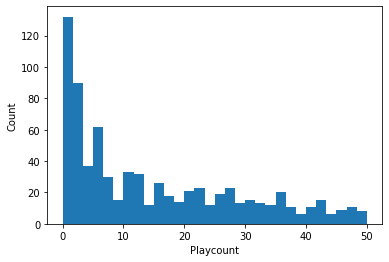

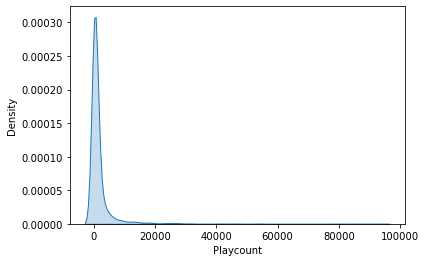

In [54]:
# Plot histogram of Playcount column
plt.hist(df['Playcount'], bins=30, range=(0,50))
plt.xlabel('Playcount')
plt.ylabel('Count')
plt.show()

# Plot density plot of Playcount column
sns.kdeplot(df['Playcount'], shade=True)
plt.xlabel('Playcount')
plt.show()


##### By segregating the variable into bins and counting the number of observations that fit into each bin, histograms can represent the frequency distribution of the variable. Density plots approximate the actual probability density function of the data and are a smoothed version of histograms.  Understanding the mean value, variability, and form of the data is made easier with the help of these plots. They may also aid in even where outliers or unusual data trends. Also, they are frequently applied as a first step in machine learning tasks that involve feature extraction and data cleaning.

### Dimensionality reduction

##### Dimensionality reduction is the technique of reducing data redundancy while decreasing the amount of variables or features in a dataset. It is widely applied in data science and machine learning to improve model performance, reduce computational complexity, and facilitate better visualisation of highly dimensional data.

#### There are several different techniques for dimensionality reduction is as follows:


#### Principal Component Analysis (PCA)
##### A common technique for reducing a dataset's dimensionality is PCA. It works by selecting the primary components in the data, that is, the directions with the greatest variance and mapping the data onto these parts. A unique set of features emerges as a result, collecting the most key facts from the initial data. It use the parameters like Dimensionality, Correlation, Orthogonal, Eigenvectors, Covariance Matrix  and these involved in developing the algorithm of PCA and firstly normalises the data and builds the covariance matrix followed by calculates the eigenvectors and eigenvalues, finally it sorts the eigenvalues in highest to lowest order and selects the number of principal components. 


#### t-SNE
##### As it is a t-distributed stochastic neighbour embedding (t-SNE). It is an unsupervised and nonlinear dimensionality reduction technique that is a unique way for visualising high-dimensional data and it preserves the pairwise distances between points in high dimensional space. Firstly measure the similarities between the points by using the Gaussian distribution of the considered data and followed by instead of gaussian distribution use the Cauchy distribution where the set of probabilities of the low dimensional space and last use the measures of these set of probabilities, where the difference between the probability distributions of the two dimensional spaces difference between the probability distributions of the spaces using Kullback-Liebler divergence. Segmentation research, learning, and evaluation could all be done using t-SNE. Choosing the number of segments is frequently done before modelling or after the results. t-SNE often reveals distinct separation in the data. This can be used either before choosing a cluster number to employ in your segmentation technique or  t-SNE does not preserve the inputs like PCA does and because the values can frequently change between runs, it cannot be used for clustering and is only intended for exploration. 

#### UMAP
##### To enhance the t-SNE the encouraged method is UMAP which rapidly increasing the sample sizes, which Data scientists use the dimensionality reduction technique known as UMAP (Uniform Manifold Approximation and Projection) to visualise high-dimensional data in smaller dimensions. Both supervised as well as unsupervised learning tasks can be performed using this nonlinear method. The UMAP technique builds a high-dimensional graph representation of the data, which is then optimised to preserve as much of its high-dimensional structure as possible in a low-dimensional graph representation. When visualising complex datasets with numerous features and nonlinear relationships between them, UMAP is especially helpful. The ability of UMAP to maintain both local and global structure in the data provides a benefit over other dimensionality reduction methods like PCA and t-SNE. Because of this, UMAP is a strong option for tasks like grouping, outlier detection, and visualisation. Several fields, including genomics, neuroscience, and computer vision, have used UMAP with success. It is an excellent tool for examining and comprehending complicated datasets, and it can aid academics and data scientists in making new discoveries and gaining new insights.


 ##### Applying few Dimensionality reduction for the data concluded between the Play count and Duration, analysis is stated below


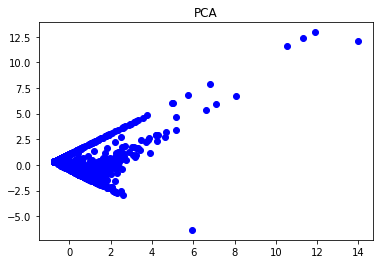

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


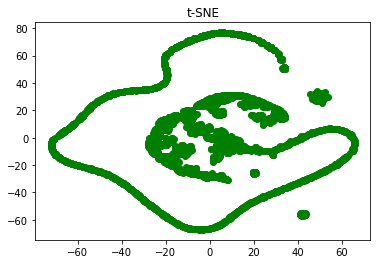

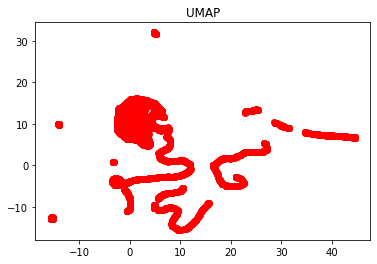

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Load the dataset
df = pd.read_csv('lastfm_data.csv')

# Separate out the features
features = ['Playcount', 'Duration']
X = df.loc[:, features].values

# Standardize the features
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the results using PCA
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue')
plt.title('PCA')
plt.show()

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_components = tsne.fit_transform(X)
tsne_df = pd.DataFrame(data=tsne_components, columns=['tsne1', 'tsne2'])

# Visualize the results using t-SNE
plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'], c='green')
plt.title('t-SNE')
plt.show()

# Apply UMAP
umap_embedding = umap.UMAP(n_neighbors=30, min_dist=0.3, n_components=2, random_state=42).fit_transform(X)
umap_df = pd.DataFrame(data=umap_embedding, columns=['umap1', 'umap2'])

# Visualize the results using UMAP
plt.scatter(umap_df['umap1'], umap_df['umap2'], c='red')
plt.title('UMAP')
plt.show()


##### Above were the plots of PCA and t-SNE, UMAP these plots were considered firstly between the play count and duration, play counts of each artist is always higher than that of the duration of this is known fact, but comparing the data with of all artists considered the duration defines the listeners and this relation between the play count and duration, the PCA plot the play count at higher degree where this is analysed like duration and play count matches for few tracks of the artists. Whereas the t-SNE there is a different analysis where the duration and default but the play counts differ as this is plotted in the above scenario in bar graphs, different artists had different play counts so, they differ by default. In  UMAP the combined relation between the play count and duration is always unique, but few tracks might collide with the duration, for example if anirudh ravichander track duration of second top song might match with of the rahul sipligunj first track. So these duration will mix to show the relation between the play counts  and duration

##### Applying few Dimensionality reduction for the data concluded between the Play count and Listeners, analysis is stated below

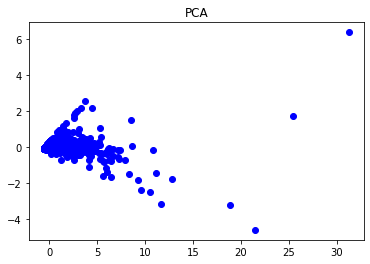

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


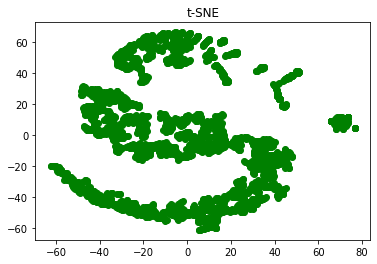

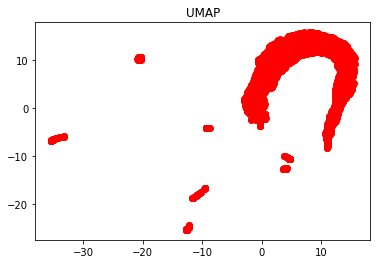

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Load the dataset
df = pd.read_csv('lastfm_data.csv')

# Separate out the features
features = ["Playcount", "Listeners"]
X = df.loc[:, features].values

# Standardize the features
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the results using PCA
plt.scatter(principal_df['PC1'], principal_df['PC2'], c='blue')
plt.title('PCA')
plt.show()

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_components = tsne.fit_transform(X)
tsne_df = pd.DataFrame(data=tsne_components, columns=['tsne1', 'tsne2'])

# Visualize the results using t-SNE
plt.scatter(tsne_df['tsne1'], tsne_df['tsne2'], c='green')
plt.title('t-SNE')
plt.show()

# Apply UMAP
umap_embedding = umap.UMAP(n_neighbors=30, min_dist=0.3, n_components=2, random_state=42).fit_transform(X)
umap_df = pd.DataFrame(data=umap_embedding, columns=['umap1', 'umap2'])

# Visualize the results using UMAP
plt.scatter(umap_df['umap1'], umap_df['umap2'], c='red')
plt.title('UMAP')
plt.show()


##### Above were the plots of PCA and t-SNE, UMAP these plots were considered firstly between the play count and listeners, the play count of each artist is considered by each listener, and the play counts over these plots proves the standard relation between the artist and listeners. The listeners enhance the play counts tagged to that of each artist who composed the song. The PCA state the stable relation between the play count and listeners and the very far plots overthere states the highest song among the artist that is play count of the top artist concluded as top artist picked accordingly to the highest play count of the considered artist. The t-SNE states the similar relation as PCA, but as the listeners define play count so, there is no much difference in comparing those fields and it visualises the perfect relation match between the fields as, play count followed by the listeners. This applies the same to the UMAP which defines the exact view, the small change due to as the UMAP is encouraged to for visualising the high dimensionality data in smaller dimensions, so complex datasets in UMAP is a strong option for tasks like grouping, outlier detection, and visualisation.

#### Summarisation

#### The "lastfm_data.csv" file contains information on the listening history of various Last.fm users which has been collected and stored. The steps involved in data analysis and dimensionality reduction are listed below:
##### Data Loading is Used the pandas read_csv() function to load the dataset.
##### Clean up your data by deleting any extraneous columns and dealing with any missing or incorrect data.
##### The extraction of features includes eliminating important elements from the data, such as the frequency and length of music played.
##### Scaling it is to  Scale the features that have been extracted to give them all the same weight in the analysis.
##### Dimensionality Reduction refers to Use different methods to decrease the dimensionality of the data and show it in a space with fewer dimensions, such as PCA, t-SNE, and UMAP.


#### The Last.fm data analysis includes the visualization of the data into lower-dimensional environments utilizing a variety of dimensionality reduction techniques. The optimum method for visualizing the data was identified by comparing the PCA, t-SNE, and UMAP results. The results demonstrated that UMAP offered the greatest depiction of the data because it was able to retain the data's overall structure while also clearly defining clusters. The data comprised different clusters of consumers who listened to comparable genres of music, as demonstrated by the UMAP visual.

#### Overall, the Last.fm data examined how dimensionality reduction methods may be used to visualize highly dimensional data and identify trends and clusters.

#### In the LastFM web page compared directly to the data considered and analysis carried by manually opening the website. So, has to analyse the visualisation performed with the last Fm page. In this  page the artist is searched and his tracks were listed according to the play counts which were high, for few artists it depends upon the users who shuffle the songs as of play counts will always update according to the listeners from the lastFM.

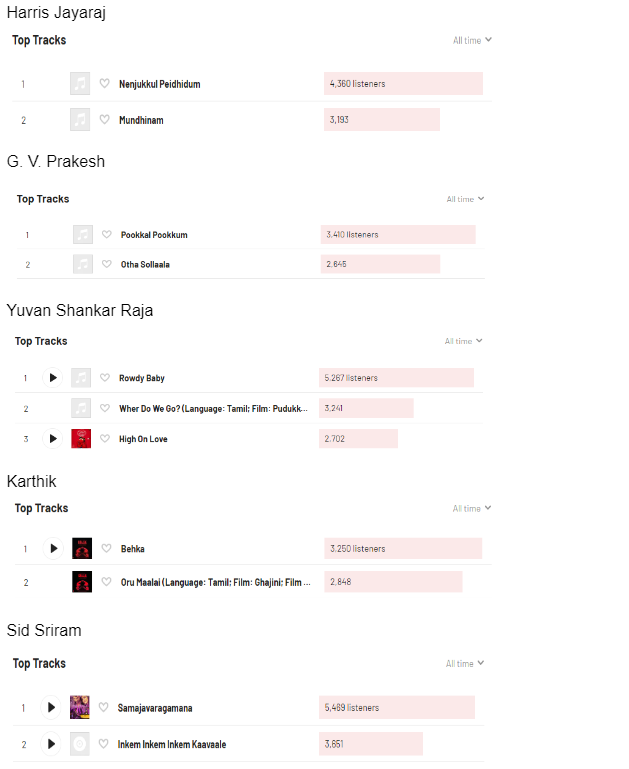

#### This is from the official top tracks from the lastFM page, which is relatively same to that of the analysed data. Moreover it’s always difficult to assert the top tracks. It completely depends upon the  listeners and it's not always the same, it will differ according to the latest release and it updates accordingly to the most played and concludes accordingly to the listeners and duration. 

#### Challenges faced in collecting data.

####  Data collection challenges that  includes:

##### Data availability is to access the necessary data can be challenging, especially if it is restricted or behind a subscription fee. Data quality is another where the accuracy and value of the analysis might be impacted by the quality of the data that was gathered. Data may be inconsistent, inaccurate, or incomplete. Relevance of the data is also an issue where Collecting relevant details can be difficult, especially when the study question or issue is challenging and calls for details from a variety of sources. Data privacy another consideration, gathering data that contains particulars might be difficult. Bias while gathering data, bias may be introduced via things like the method of sampling, the questions presented, and the circumstances in which the data was collected. 


#### The analysis of the LastFM data produced the following significant findings:

##### A small percentage of tracks had very high playcounts, whereas others had extremely low playcounts, producing a highly dispersed pattern of play counts. The playcount and duration features were found to be highly associated by PCA, and the majority of the variance in the data could be explained by a single principal component. The results of the t-SNE and UMAP examinations showed that the tracks with more plays tended to group together, suggesting that the data may have some underlying structure based on user listening preferences.


##### For further analysis of the future work that makes the analysis, such as in filtering and considering the data from the artist can be sorted by the preference analysis; like this can be done by filter the tracks that hits top within the specific days like top track with in last 7 days, last 90 days, In this way the new top tracks of each artist will be specific and can state that this is the top tracks and latest within the range of dates. This can Identify the most well-liked genres and performers among the dataset's users, then examine how these preferences change depending on age, gender, and region. User behaviour analysis: Examine how users interact with the music platform, including how often and how long they listen, which features they use the most, and what devices they use to access it. Analyse the accuracy of the music platform's recommendation system by tracking how frequently users listen to tracks that are suggested to them and how this influences their musical preferences. Analyse how various music trends, such as the popularity of different genres, singers, and songs, evolve over time, and how these trends are influenced by social media and advertising. Sentiment analysis is to examine the users' music listening behaviour and preferences in terms of their moods, like if they favour uplifting or depressing music, and how these feelings change during the day or week. 
##### Playlist analysis is to analyse the features of playlists made by users, including their size, duration, and content, as well as how other users can access and share them.  Cross-platform analysis is helpful to interact with the music platform on various platforms and devices, including mobile, desktop, and smart speakers, and how this affects their musical interests and ability to listen habits.
